In [1]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
#import os
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import xarray as xr
import matplotlib.patches as patches
import os
import cartopy.mpl.ticker as cticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import re
import datetime
import pandas as pd
import matplotlib.dates as mdates
import matplotlib.colors as mcolors
import datetime
from matplotlib.colors import ListedColormap
from matplotlib.colors import TwoSlopeNorm

In [11]:
%store -r data_array_ec_values

In [12]:
data_array_ec_values

<xarray.DataArray (dim_0: 15, dim_1: 50)>
array([[291.7541 , 296.26154, 295.52087, 294.4865 , 294.36575, 290.0643 ,
        292.45987, 295.1755 , 297.85748, 290.64865, 297.1043 , 291.78534,
        296.0061 , 293.0282 , 297.4206 , 295.37943, 295.3857 , 295.75317,
        289.41098, 296.63403, 292.5378 , 291.78568, 291.62302, 295.17987,
        291.10254, 293.3071 , 290.81628, 293.46222, 292.9803 , 293.20148,
        291.57477, 294.0594 , 291.63086, 294.03992, 291.53445, 292.64053,
        289.864  , 290.93982, 292.30646, 293.8777 , 297.61615, 290.62738,
        295.46124, 294.1437 , 295.18106, 289.03513, 292.44583, 295.52444,
        297.78073, 292.4066 ],
       [290.84552, 288.94247, 295.03384, 298.03348, 294.41547, 292.80807,
        296.2743 , 294.23068, 295.05432, 293.30954, 296.19345, 291.7482 ,
        293.11255, 300.45404, 294.80243, 290.22617, 293.4184 , 297.89862,
        295.52417, 297.26923, 290.39267, 293.9745 , 293.9495 , 294.7393 ,
        294.56488, 292.89352, 293.5766 , 296.26718, 292.14163, 292.66968,
        297.98306, 292.4652 , 295.40683, 292.3738 , 295.55167, 291.0374 ,
        298.50696, 294.9698 , 298.30585, 292.0929 , 294.86295, 293.74722,
        292.57532, 294.0286 , 296.93982, 296.50247, 294.4311 , 296.9702 ,
        295.77878, 296.15637],
       [294.67706, 294.93723, 289.55078, 293.2146 , 299.14825, 293.8818 ,
        294.89056, 298.51434, 295.48074, 295.6272 , 295.61536, 292.5769 ,
...
        302.08975, 301.13477, 301.95374, 301.42108, 302.1847 , 302.13235,
        301.93155, 301.893  ],
       [302.15253, 302.04745, 301.84238, 301.9102 , 301.86276, 302.6066 ,
        301.7785 , 302.02478, 302.18997, 302.1637 , 301.5732 , 302.57825,
        301.33243, 301.9741 , 301.9169 , 302.03574, 301.84378, 301.48978,
        301.9367 , 302.29282, 301.78912, 301.32367, 302.20374, 301.2962 ,
        302.1179 , 302.07913, 302.12567, 302.01544, 301.62833, 300.7158 ,
        302.38535, 301.7389 , 302.01077, 302.1108 , 301.78625, 302.4447 ,
        301.7522 , 302.41577, 301.73804, 302.0176 , 302.17242, 301.5992 ,
        302.24774, 301.49603, 301.6258 , 302.21298, 302.13174, 301.31952,
        302.23306, 301.9776 ],
       [301.3316 , 301.8708 , 301.53986, 301.4633 , 301.37335, 301.68857,
        301.33456, 301.63327, 301.14612, 301.63818, 301.4213 , 301.5795 ,
        301.2556 , 301.63104, 301.53275, 301.26895, 301.23743, 300.8473 ,
        301.79593, 301.46066, 300.38983, 301.42075, 301.40353, 301.6178 ,
        301.29105, 301.70035, 301.56973, 301.44424, 301.52847, 300.7327 ,
        301.4337 , 301.9411 , 301.48965, 301.19376, 301.1825 , 301.42484,
        301.5778 , 301.15598, 301.58856, 301.349  , 301.6307 , 301.3518 ,
        301.64792, 300.56897, 301.3253 , 300.84662, 301.3375 , 301.77176,
        301.6366 , 301.58563]], dtype=float32)
Dimensions without coordinates: dim_0, dim_1

In [13]:
ds_fcn_ec_1 = xr.open_dataset('/pfs/work7/workspace/scratch/ab6801-fourcastnet/fourcastnet/with_ecmwf_ic/20210615_00_backtransformed.nc') 
variable_data_fcn_ec_1 = ds_fcn_ec_1['forecast'][:,56,2,79:159,194:274]
#mean_fcn_ec_1 = np.mean(variable_data_fcn_ec_1, axis=(-2, -1))


ds_fcn_ec_2 = xr.open_dataset('/pfs/work7/workspace/scratch/ab6801-fourcastnet/fourcastnet/with_ecmwf_ic/20210616_00_backtransformed.nc') 
variable_data_fcn_ec_2 = ds_fcn_ec_2['forecast'][:,52,2,79:159,194:274]
#mean_fcn_ec_1 = np.mean(variable_data_fcn_ec_1, axis=(-2, -1))

ds_fcn_ec_3 = xr.open_dataset('/pfs/work7/workspace/scratch/ab6801-fourcastnet/fourcastnet/with_ecmwf_ic/20210617_00_backtransformed.nc') 
variable_data_fcn_ec_3 = ds_fcn_ec_3['forecast'][:,48,2,79:159,194:274]
#mean_fcn_ec_1 = np.mean(variable_data_fcn_ec_1, axis=(-2, -1))

ds_fcn_ec_4 = xr.open_dataset('/pfs/work7/workspace/scratch/ab6801-fourcastnet/fourcastnet/with_ecmwf_ic/20210618_00_backtransformed.nc') 
variable_data_fcn_ec_4 = ds_fcn_ec_4['forecast'][:,44,2,79:159,194:274]
#mean_fcn_ec_1 = np.mean(variable_data_fcn_ec_1, axis=(-2, -1))

ds_fcn_ec_5 = xr.open_dataset('/pfs/work7/workspace/scratch/ab6801-fourcastnet/fourcastnet/with_ecmwf_ic/20210619_00_backtransformed.nc') 
variable_data_fcn_ec_5 = ds_fcn_ec_5['forecast'][:,40,2,79:159,194:274]
#mean_fcn_ec_1 = np.mean(variable_data_fcn_ec_1, axis=(-2, -1))

ds_fcn_ec_6 = xr.open_dataset('/pfs/work7/workspace/scratch/ab6801-fourcastnet/fourcastnet/with_ecmwf_ic/20210620_00_backtransformed.nc') 
variable_data_fcn_ec_6 = ds_fcn_ec_6['forecast'][:,36,2,79:159,194:274]
#mean_fcn_ec_1 = np.mean(variable_data_fcn_ec_1, axis=(-2, -1))

ds_fcn_ec_7 = xr.open_dataset('/pfs/work7/workspace/scratch/ab6801-fourcastnet/fourcastnet/with_ecmwf_ic/20210621_00_backtransformed.nc') 
variable_data_fcn_ec_7 = ds_fcn_ec_7['forecast'][:,32,2,79:159,194:274]
#mean_fcn_ec_1 = np.mean(variable_data_fcn_ec_1, axis=(-2, -1))

ds_fcn_ec_8 = xr.open_dataset('/pfs/work7/workspace/scratch/ab6801-fourcastnet/fourcastnet/with_ecmwf_ic/20210622_00_backtransformed.nc') 
variable_data_fcn_ec_8 = ds_fcn_ec_8['forecast'][:,28,2,79:159,194:274]
#mean_fcn_ec_1 = np.mean(variable_data_fcn_ec_1, axis=(-2, -1))

ds_fcn_ec_9 = xr.open_dataset('/pfs/work7/workspace/scratch/ab6801-fourcastnet/fourcastnet/with_ecmwf_ic/20210623_00_backtransformed.nc') 
variable_data_fcn_ec_9 = ds_fcn_ec_9['forecast'][:,24,2,79:159,194:274]
#mean_fcn_ec_1 = np.mean(variable_data_fcn_ec_1, axis=(-2, -1))

ds_fcn_ec_10 = xr.open_dataset('/pfs/work7/workspace/scratch/ab6801-fourcastnet/fourcastnet/with_ecmwf_ic/20210624_00_backtransformed.nc') 
variable_data_fcn_ec_10 = ds_fcn_ec_10['forecast'][:,20,2,79:159,194:274]
#mean_fcn_ec_1 = np.mean(variable_data_fcn_ec_1, axis=(-2, -1))

ds_fcn_ec_11 = xr.open_dataset('/pfs/work7/workspace/scratch/ab6801-fourcastnet/fourcastnet/with_ecmwf_ic/20210625_00_backtransformed.nc') 
variable_data_fcn_ec_11 = ds_fcn_ec_11['forecast'][:,16,2,79:159,194:274]
#mean_fcn_ec_1 = np.mean(variable_data_fcn_ec_1, axis=(-2, -1))

ds_fcn_ec_12 = xr.open_dataset('/pfs/work7/workspace/scratch/ab6801-fourcastnet/fourcastnet/with_ecmwf_ic/20210626_00_backtransformed.nc') 
variable_data_fcn_ec_12 = ds_fcn_ec_12['forecast'][:,12,2,79:159,194:274]
#mean_fcn_ec_1 = np.mean(variable_data_fcn_ec_1, axis=(-2, -1))

ds_fcn_ec_13= xr.open_dataset('/pfs/work7/workspace/scratch/ab6801-fourcastnet/fourcastnet/with_ecmwf_ic/20210627_00_backtransformed.nc') 
variable_data_fcn_ec_13 = ds_fcn_ec_13['forecast'][:,8,2,79:159,194:274]
#mean_fcn_ec_1 = np.mean(variable_data_fcn_ec_1, axis=(-2, -1))

ds_fcn_ec_14 = xr.open_dataset('/pfs/work7/workspace/scratch/ab6801-fourcastnet/fourcastnet/with_ecmwf_ic/20210628_00_backtransformed.nc') 
variable_data_fcn_ec_14 = ds_fcn_ec_14['forecast'][:,4,2,79:159,194:274]
#mean_fcn_ec_1 = np.mean(variable_data_fcn_ec_1, axis=(-2, -1))

In [14]:
new_dimension = 'time'
ds_fcn_ec_1_expanded = variable_data_fcn_ec_1.expand_dims(**{new_dimension: [0]})
ds_fcn_ec_2_expanded = variable_data_fcn_ec_2.expand_dims(**{new_dimension: [1]})
ds_fcn_ec_3_expanded = variable_data_fcn_ec_3.expand_dims(**{new_dimension: [2]})
ds_fcn_ec_4_expanded = variable_data_fcn_ec_4.expand_dims(**{new_dimension: [3]})
ds_fcn_ec_5_expanded = variable_data_fcn_ec_5.expand_dims(**{new_dimension: [4]})
ds_fcn_ec_6_expanded = variable_data_fcn_ec_6.expand_dims(**{new_dimension: [5]})
ds_fcn_ec_7_expanded = variable_data_fcn_ec_7.expand_dims(**{new_dimension: [6]})
ds_fcn_ec_8_expanded = variable_data_fcn_ec_8.expand_dims(**{new_dimension: [7]})
ds_fcn_ec_9_expanded = variable_data_fcn_ec_9.expand_dims(**{new_dimension: [8]})
ds_fcn_ec_10_expanded = variable_data_fcn_ec_10.expand_dims(**{new_dimension:[9]})
ds_fcn_ec_11_expanded = variable_data_fcn_ec_11.expand_dims(**{new_dimension: [10]})
ds_fcn_ec_12_expanded = variable_data_fcn_ec_12.expand_dims(**{new_dimension: [11]})
ds_fcn_ec_13_expanded = variable_data_fcn_ec_13.expand_dims(**{new_dimension: [12]})
ds_fcn_ec_14_expanded = variable_data_fcn_ec_14.expand_dims(**{new_dimension: [13]})


In [15]:
mean_ds_fcn_ec_gb = xr.concat([ds_fcn_ec_1_expanded,ds_fcn_ec_2_expanded,ds_fcn_ec_3_expanded,ds_fcn_ec_4_expanded,ds_fcn_ec_5_expanded,ds_fcn_ec_6_expanded,ds_fcn_ec_7_expanded,ds_fcn_ec_8_expanded,ds_fcn_ec_9_expanded,ds_fcn_ec_10_expanded,ds_fcn_ec_11_expanded,ds_fcn_ec_12_expanded,ds_fcn_ec_13_expanded,ds_fcn_ec_14_expanded],dim=new_dimension)

In [16]:
np.shape(mean_ds_fcn_ec_gb)

(14, 51, 80, 80)

In [17]:
#era5

ds_era = xr.open_dataset('/pfs/work7/workspace/scratch/ab6801-fourcastnet/era5/2021.h5')
ds_era





ds_era5 = ds_era.fields[656:737:4,2,260:40:-1,720:1200]
np.shape(ds_era5)
ds_era5_1 = ds_era5[:,61:141,194:274]
np.shape(ds_era5_1)



era5_06_29 = ds_era5_1[15,:,:]
era5_06_29

<xarray.DataArray 'fields' (phony_dim_2: 80, phony_dim_3: 80)>
[6400 values with dtype=float32]
Dimensions without coordinates: phony_dim_2, phony_dim_3

In [18]:
np.shape(era5_06_29)
era5_06_29 = np.array(era5_06_29)

In [19]:
era5_06_29

array([[289.1162 , 289.0922 , 288.97604, ..., 302.94272, 304.22626,
        302.1558 ],
       [289.08017, 289.04013, 288.95   , ..., 303.78973, 304.38443,
        299.7629 ],
       [288.97205, 288.932  , 288.8339 , ..., 303.3392 , 304.855  ,
        300.33762],
       ...,
       [300.4037 , 299.6508 , 299.55667, ..., 301.83942, 301.96954,
        302.35   ],
       [300.66602, 299.837  , 299.7529 , ..., 301.48898, 301.60312,
        301.93552],
       [300.55588, 300.20544, 300.20346, ..., 301.2647 , 301.22266,
        301.13657]], dtype=float32)

In [20]:
from numpy import zeros, newaxis
rmse_per_member = np.zeros((14, 51),dtype=object)
#era5_06_29 = era5_06_29[newaxis,newaxis,:,:]
#era5_06_29_4d = era5_06_29_3d[newaxis,:, :, :]
# Reshape the 2D array to match the last two dimensions of the 4D array


In [21]:
np.shape(era5_06_29) 

(80, 80)

In [22]:
np.shape(era5_06_29)

(80, 80)

In [23]:
mean_ds_fcn_ec_gb = np.array(mean_ds_fcn_ec_gb)

In [24]:
np.shape(mean_ds_fcn_ec_gb)

(14, 51, 80, 80)

In [25]:
np.shape(era5_06_29)

(80, 80)

In [26]:
# Iterate through each member in the 4D array
for i in range(14):
    for j in range(51):
        # Calculate the squared differences for the current member
        rmse_per_member[i, j] = np.sqrt(np.mean((mean_ds_fcn_ec_gb[i, j, :, :] - era5_06_29)**2))
        #print(np.shape(squared_diff))
        # Calculate the mean of squared differences over the first two dimensions (80x80)
        #mean_squared_diff = np.mean(squared_diff, axis=(0, 1))

        # Take the square root to get the RMSE for the current member
        #rmse_per_member[i, j] = np.sqrt(mean_squared_diff)

In [27]:
np.shape(rmse_per_member)

(14, 51)

In [28]:
rmse_flattened = rmse_per_member.flatten()

{'whiskers': [<matplotlib.lines.Line2D at 0x14d6be6ef5b0>,
 'caps': [<matplotlib.lines.Line2D at 0x14d6be6efaf0>,
 'boxes': [<matplotlib.lines.Line2D at 0x14d6be6ef430>],
 'medians': [<matplotlib.lines.Line2D at 0x14d6be705070>],
 'fliers': [],
 'means': []}

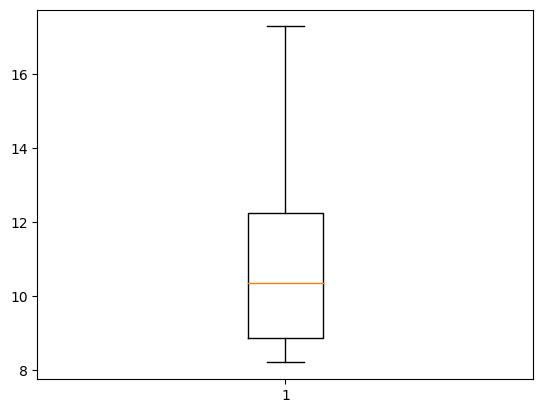

In [29]:
plt.boxplot(rmse_flattened,showfliers=False)

In [30]:
rmse_30 = np.percentile(rmse_flattened,30)
rmse_70 = np.percentile(rmse_flattened,70)
rmse_70

11.838252800587462

In [31]:
below_30th_percentile = rmse_per_member < rmse_30
above_70th_percentile = rmse_per_member > rmse_70

In [32]:
np.shape(below_30th_percentile)

(14, 51)

In [33]:
good_forecast_index = np.where(rmse_per_member < rmse_30)
bad_forecast_index = np.where(rmse_per_member > rmse_70)


In [80]:
good_forecast_index_fcn_ec = good_forecast_index
bad_forecast_index_fcn_ec = bad_forecast_index
%store good_forecast_index_fcn_ec
%store bad_forecast_index_fcn_ec

Stored 'good_forecast_index_fcn_ec' (tuple)
Stored 'bad_forecast_index_fcn_ec' (tuple)


In [34]:
np.shape(mean_ds_fcn_ec_gb)

(14, 51, 80, 80)

In [35]:
good_forecast = mean_ds_fcn_ec_gb[good_forecast_index]
bad_forecast = mean_ds_fcn_ec_gb[bad_forecast_index]

In [36]:
good_forecast_mean = np.mean(good_forecast,axis = 0)
bad_forecast_mean = np.mean(bad_forecast,axis = 0)

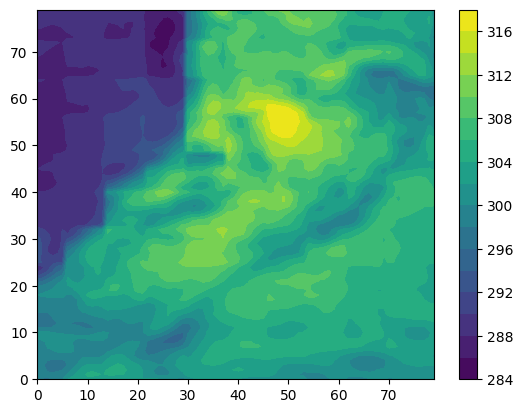

In [37]:
plt.contourf(good_forecast_mean,levels=20)
plt.colorbar()

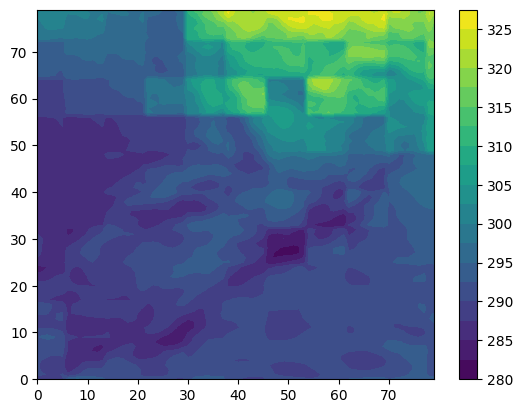

In [38]:
plt.contourf(bad_forecast_mean,levels=20)
plt.colorbar()

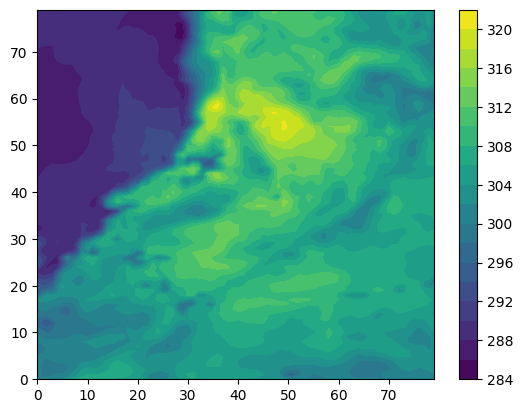

In [39]:
plt.contourf(era5_06_29[::-1,:],levels=20)
plt.colorbar()

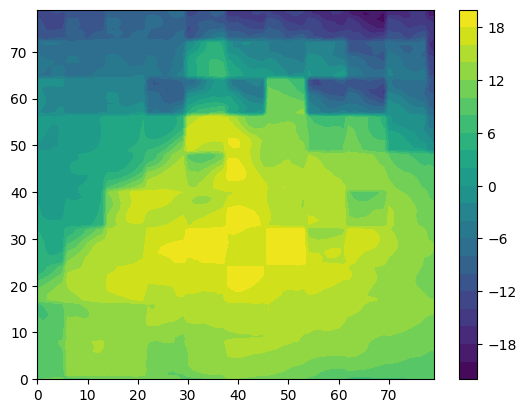

In [40]:
plt.contourf(good_forecast_mean-bad_forecast_mean,levels=20)
plt.colorbar()

In [27]:
ds_fcn_ec_1 = xr.open_dataset('/pfs/work7/workspace/scratch/ab6801-fourcastnet/fourcastnet/with_ecmwf_ic/20210615_00_backtransformed.nc') 
variable_data_fcn_ec_1 = ds_fcn_ec_1['forecast'][:,56,2,:,:]
#mean_fcn_ec_1 = np.mean(variable_data_fcn_ec_1, axis=(-2, -1))


ds_fcn_ec_2 = xr.open_dataset('/pfs/work7/workspace/scratch/ab6801-fourcastnet/fourcastnet/with_ecmwf_ic/20210616_00_backtransformed.nc') 
variable_data_fcn_ec_2 = ds_fcn_ec_2['forecast'][:,52,2,:,:]
#mean_fcn_ec_1 = np.mean(variable_data_fcn_ec_1, axis=(-2, -1))

ds_fcn_ec_3 = xr.open_dataset('/pfs/work7/workspace/scratch/ab6801-fourcastnet/fourcastnet/with_ecmwf_ic/20210617_00_backtransformed.nc') 
variable_data_fcn_ec_3 = ds_fcn_ec_3['forecast'][:,48,2,:,:]
#mean_fcn_ec_1 = np.mean(variable_data_fcn_ec_1, axis=(-2, -1))

ds_fcn_ec_4 = xr.open_dataset('/pfs/work7/workspace/scratch/ab6801-fourcastnet/fourcastnet/with_ecmwf_ic/20210618_00_backtransformed.nc') 
variable_data_fcn_ec_4 = ds_fcn_ec_4['forecast'][:,44,2,:,:]
#mean_fcn_ec_1 = np.mean(variable_data_fcn_ec_1, axis=(-2, -1))

ds_fcn_ec_5 = xr.open_dataset('/pfs/work7/workspace/scratch/ab6801-fourcastnet/fourcastnet/with_ecmwf_ic/20210619_00_backtransformed.nc') 
variable_data_fcn_ec_5 = ds_fcn_ec_5['forecast'][:,40,2,:,:]
#mean_fcn_ec_1 = np.mean(variable_data_fcn_ec_1, axis=(-2, -1))

ds_fcn_ec_6 = xr.open_dataset('/pfs/work7/workspace/scratch/ab6801-fourcastnet/fourcastnet/with_ecmwf_ic/20210620_00_backtransformed.nc') 
variable_data_fcn_ec_6 = ds_fcn_ec_6['forecast'][:,36,2,:,:]
#mean_fcn_ec_1 = np.mean(variable_data_fcn_ec_1, axis=(-2, -1))

ds_fcn_ec_7 = xr.open_dataset('/pfs/work7/workspace/scratch/ab6801-fourcastnet/fourcastnet/with_ecmwf_ic/20210621_00_backtransformed.nc') 
variable_data_fcn_ec_7 = ds_fcn_ec_7['forecast'][:,32,2,:,:]
#mean_fcn_ec_1 = np.mean(variable_data_fcn_ec_1, axis=(-2, -1))

ds_fcn_ec_8 = xr.open_dataset('/pfs/work7/workspace/scratch/ab6801-fourcastnet/fourcastnet/with_ecmwf_ic/20210622_00_backtransformed.nc') 
variable_data_fcn_ec_8 = ds_fcn_ec_8['forecast'][:,28,2,:,:]
#mean_fcn_ec_1 = np.mean(variable_data_fcn_ec_1, axis=(-2, -1))

ds_fcn_ec_9 = xr.open_dataset('/pfs/work7/workspace/scratch/ab6801-fourcastnet/fourcastnet/with_ecmwf_ic/20210623_00_backtransformed.nc') 
variable_data_fcn_ec_9 = ds_fcn_ec_9['forecast'][:,24,2,:,:]
#mean_fcn_ec_1 = np.mean(variable_data_fcn_ec_1, axis=(-2, -1))

ds_fcn_ec_10 = xr.open_dataset('/pfs/work7/workspace/scratch/ab6801-fourcastnet/fourcastnet/with_ecmwf_ic/20210624_00_backtransformed.nc') 
variable_data_fcn_ec_10 = ds_fcn_ec_10['forecast'][:,20,2,:,:]
#mean_fcn_ec_1 = np.mean(variable_data_fcn_ec_1, axis=(-2, -1))

ds_fcn_ec_11 = xr.open_dataset('/pfs/work7/workspace/scratch/ab6801-fourcastnet/fourcastnet/with_ecmwf_ic/20210625_00_backtransformed.nc') 
variable_data_fcn_ec_11 = ds_fcn_ec_11['forecast'][:,16,2,:,:]
#mean_fcn_ec_1 = np.mean(variable_data_fcn_ec_1, axis=(-2, -1))

ds_fcn_ec_12 = xr.open_dataset('/pfs/work7/workspace/scratch/ab6801-fourcastnet/fourcastnet/with_ecmwf_ic/20210626_00_backtransformed.nc') 
variable_data_fcn_ec_12 = ds_fcn_ec_12['forecast'][:,12,2,:,:]
#mean_fcn_ec_1 = np.mean(variable_data_fcn_ec_1, axis=(-2, -1))

ds_fcn_ec_13= xr.open_dataset('/pfs/work7/workspace/scratch/ab6801-fourcastnet/fourcastnet/with_ecmwf_ic/20210627_00_backtransformed.nc') 
variable_data_fcn_ec_13 = ds_fcn_ec_13['forecast'][:,8,2,:,:]
#mean_fcn_ec_1 = np.mean(variable_data_fcn_ec_1, axis=(-2, -1))

ds_fcn_ec_14 = xr.open_dataset('/pfs/work7/workspace/scratch/ab6801-fourcastnet/fourcastnet/with_ecmwf_ic/20210628_00_backtransformed.nc') 
variable_data_fcn_ec_14 = ds_fcn_ec_14['forecast'][:,4,2,:,:]
#mean_fcn_ec_1 = np.mean(variable_data_fcn_ec_1, axis=(-2, -1))

In [28]:
new_dimension = 'time'
ds_fcn_ec_1_expanded = variable_data_fcn_ec_1.expand_dims(**{new_dimension: [0]})
ds_fcn_ec_2_expanded = variable_data_fcn_ec_2.expand_dims(**{new_dimension: [1]})
ds_fcn_ec_3_expanded = variable_data_fcn_ec_3.expand_dims(**{new_dimension: [2]})
ds_fcn_ec_4_expanded = variable_data_fcn_ec_4.expand_dims(**{new_dimension: [3]})
ds_fcn_ec_5_expanded = variable_data_fcn_ec_5.expand_dims(**{new_dimension: [4]})
ds_fcn_ec_6_expanded = variable_data_fcn_ec_6.expand_dims(**{new_dimension: [5]})
ds_fcn_ec_7_expanded = variable_data_fcn_ec_7.expand_dims(**{new_dimension: [6]})
ds_fcn_ec_8_expanded = variable_data_fcn_ec_8.expand_dims(**{new_dimension: [7]})
ds_fcn_ec_9_expanded = variable_data_fcn_ec_9.expand_dims(**{new_dimension: [8]})
ds_fcn_ec_10_expanded = variable_data_fcn_ec_10.expand_dims(**{new_dimension:[9]})
ds_fcn_ec_11_expanded = variable_data_fcn_ec_11.expand_dims(**{new_dimension: [10]})
ds_fcn_ec_12_expanded = variable_data_fcn_ec_12.expand_dims(**{new_dimension: [11]})
ds_fcn_ec_13_expanded = variable_data_fcn_ec_13.expand_dims(**{new_dimension: [12]})
ds_fcn_ec_14_expanded = variable_data_fcn_ec_14.expand_dims(**{new_dimension: [13]})


In [29]:
mean_ds_fcn_ec_gb_whole = xr.concat([ds_fcn_ec_1_expanded,ds_fcn_ec_2_expanded,ds_fcn_ec_3_expanded,ds_fcn_ec_4_expanded,ds_fcn_ec_5_expanded,ds_fcn_ec_6_expanded,ds_fcn_ec_7_expanded,ds_fcn_ec_8_expanded,ds_fcn_ec_9_expanded,ds_fcn_ec_10_expanded,ds_fcn_ec_11_expanded,ds_fcn_ec_12_expanded,ds_fcn_ec_13_expanded,ds_fcn_ec_14_expanded],dim=new_dimension)

In [39]:
good_forecast_index

(array([ 4,  4,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,
         9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,
         9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
        10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,
        10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 11,
        11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11,
        11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11,
        11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12,
        12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12,
        12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13,
        13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13,
        13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13,
        13, 13, 13, 13, 13, 13, 13, 13, 13, 13]),
 array([ 9, 34,  0,  2,  3,  4,  5,  6

In [2]:
%store -r mean_ds_fcn_ec_gb_whole
%store -r good_forecast_index

In [41]:
large_array = mean_ds_fcn_ec_gb_whole

In [42]:
index_array = good_forecast_index 

In [43]:
# Define the batch size (adjust this based on available memory)
batch_size = 30

# Loop to pick subsets of the large array based on indices
for i in range(0, 214, batch_size):
    batch_indices_1 = index_array[0][i:i+batch_size]
    batch_indices_2 = index_array[1][i:i+batch_size]
    print(batch_indices_1)
    good_subsets = large_array[batch_indices_1,batch_indices_2,:,:]

[4 4 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9]
[ 9  9  9  9  9 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10
 10 10 10 10 10 10]
[10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10
 11 11 11 11 11 11]
[11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11
 11 11 11 11 11 11]
[11 11 11 11 11 11 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12
 12 12 12 12 12 12]
[12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 13 13 13 13 13 13 13
 13 13 13 13 13 13]
[13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13
 13 13 13 13 13 13]
[13 13 13 13]


In [44]:
index_array = bad_forecast_index 

In [45]:
# Define the batch size (adjust this based on available memory)
batch_size = 30

# Loop to pick subsets of the large array based on indices
for i in range(0, 214, batch_size):
    batch_indices_1 = index_array[0][i:i+batch_size]
    batch_indices_2 = index_array[1][i:i+batch_size]
    print(batch_indices_1)
    bad_subsets = large_array[batch_indices_1,batch_indices_2,:,:]

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
[2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]
[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 5 5 5 5 5 6 6 6 6 6]
[6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 7 7 8 8 8 8 8 8]
[8 8 8 8]


In [46]:
fcn_ec_bad = np.mean(bad_subsets,axis = (0,1))

In [7]:

lat = np.linspace(25, 80, 220)
lon = np.linspace(-180, -60, 480)
lon_grid, lat_grid = np.meshgrid(lon, lat)
x, y = lon_grid, lat_grid 

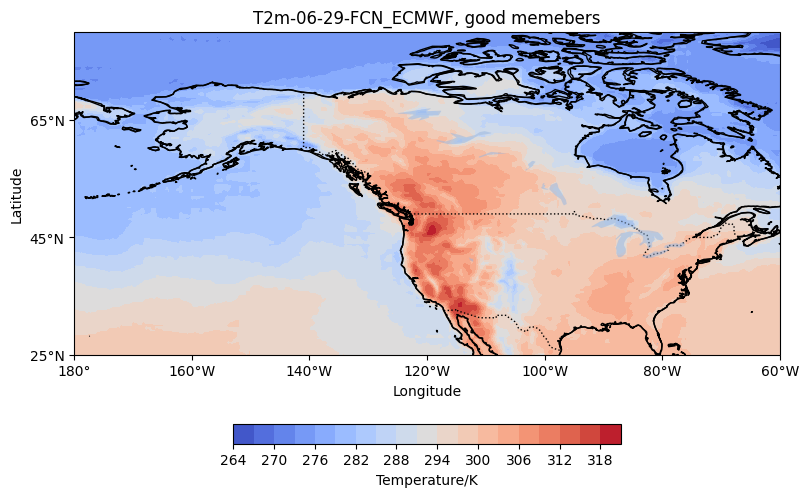

In [76]:
fig2 = plt.figure(figsize=(10,6))
#proj = ccrs.PlateCarree(central_longitude=-120)
#ax1 = fig2.add_axes([0.1, 0.8, 0.5, 0.3],projection = proj)
ax2 = plt.axes(projection=ccrs.PlateCarree())
#proj = ccrs.PlateCarree(central_longitude=-120) 
#x_fcn, y_fcn = lon_grid_fcn, lat_grid_fcn
leftlon, rightlon, lowerlat, upperlat = (-180,-60,25,80)#define map extent

#f2_ax1 = fig.add_axes([0.1, 0.8, 0.5, 0.3],projection = proj)
ax2.set_extent([leftlon, rightlon, lowerlat, upperlat], crs=ccrs.PlateCarree())
                  
                  
# Add map features
ax2.add_feature(cfeature.COASTLINE)
ax2.add_feature(cfeature.BORDERS, linestyle=':')
ax2.add_feature(cfeature.LAND, facecolor='lightgray')
ax2.add_feature(cfeature.OCEAN, facecolor='w')


ax2.add_feature(cfeature.COASTLINE.with_scale('50m'))
ax2.add_feature(cfeature.LAKES, alpha=0.5)
ax2.set_xticks(np.arange(leftlon,rightlon+10,20), crs=ccrs.PlateCarree())
ax2.set_yticks(np.arange(lowerlat,upperlat,20), crs=ccrs.PlateCarree())

lat_formatter = cticker.LatitudeFormatter()
lon_formatter = cticker.LongitudeFormatter()

ax2.xaxis.set_major_formatter(lon_formatter)
ax2.yaxis.set_major_formatter(lat_formatter)

# Plot the contour map
#contour = ax.contourf(lon,lat,ds_era.fields[676,2,260:40:-1,720:1200],cmap='jet',levels=20)
#phony_dim_4-lat phony_dim_5-lon phony_dim_0-leadtime(21) phony_dim_2-time 57(0:ground truth,intervel:6h,start from 2021.06.14 00UTC,) phony_dim_1-pertubated members phony_dim_3:variables
#assume time intervel in lead time is 3h
#lead time: 18 36 54 72
#time 2021.06.14-07.04UTC 00:00

#control forecast
contour = ax2.contourf(x, y,fcn_ec_good[::-1,:],cmap='coolwarm',levels=20)

#lead time as 0, which is the ground truth. but seems like wrong

#ds_fcn_ecmwf.isel(phony_dim_0 = 1, phony_dim_1 = 1,phony_dim_2 = 2,phony_dim_3=slice(None,None,-1)).forecast.plot()
#control forecast

# Add colorbar
cbar = plt.colorbar(contour, ax=ax2, label='Temperature/K',orientation='horizontal',shrink=0.5)

# Set plot title and labels
#plt.title('Temperature Contour Map')
#plt.xlabel('Longitude')
#plt.ylabel('Latitude')
#cbar = plt.colorbar(contour, ax=ax1, label='Temperature/K',orientation='horizontal',shrink=0.5)
plt.title('T2m-06-29-FCN_ECMWF, good memebers')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.savefig('/home/kit/imk-tro/gj5173/03.10-plots/T2m_fcn_ec-good.png', bbox_inches='tight',dpi=100)

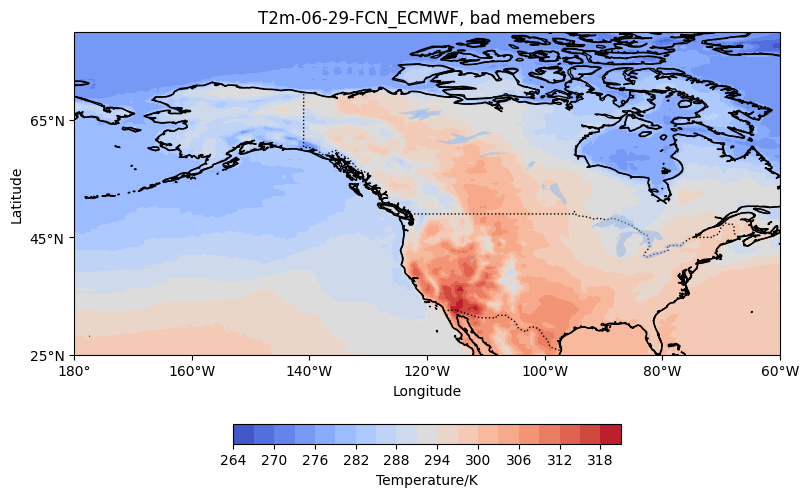

In [77]:
fig2 = plt.figure(figsize=(10,6))
#proj = ccrs.PlateCarree(central_longitude=-120)
#ax1 = fig2.add_axes([0.1, 0.8, 0.5, 0.3],projection = proj)
ax2 = plt.axes(projection=ccrs.PlateCarree())
#proj = ccrs.PlateCarree(central_longitude=-120) 
#x_fcn, y_fcn = lon_grid_fcn, lat_grid_fcn
leftlon, rightlon, lowerlat, upperlat = (-180,-60,25,80)#define map extent

#f2_ax1 = fig.add_axes([0.1, 0.8, 0.5, 0.3],projection = proj)
ax2.set_extent([leftlon, rightlon, lowerlat, upperlat], crs=ccrs.PlateCarree())
                  
                  
# Add map features
ax2.add_feature(cfeature.COASTLINE)
ax2.add_feature(cfeature.BORDERS, linestyle=':')
ax2.add_feature(cfeature.LAND, facecolor='lightgray')
ax2.add_feature(cfeature.OCEAN, facecolor='w')


ax2.add_feature(cfeature.COASTLINE.with_scale('50m'))
ax2.add_feature(cfeature.LAKES, alpha=0.5)
ax2.set_xticks(np.arange(leftlon,rightlon+10,20), crs=ccrs.PlateCarree())
ax2.set_yticks(np.arange(lowerlat,upperlat,20), crs=ccrs.PlateCarree())

lat_formatter = cticker.LatitudeFormatter()
lon_formatter = cticker.LongitudeFormatter()

ax2.xaxis.set_major_formatter(lon_formatter)
ax2.yaxis.set_major_formatter(lat_formatter)

# Plot the contour map
#contour = ax.contourf(lon,lat,ds_era.fields[676,2,260:40:-1,720:1200],cmap='jet',levels=20)
#phony_dim_4-lat phony_dim_5-lon phony_dim_0-leadtime(21) phony_dim_2-time 57(0:ground truth,intervel:6h,start from 2021.06.14 00UTC,) phony_dim_1-pertubated members phony_dim_3:variables
#assume time intervel in lead time is 3h
#lead time: 18 36 54 72
#time 2021.06.14-07.04UTC 00:00

#control forecast
contour = ax2.contourf(x, y,fcn_ec_bad[::-1,:],cmap='coolwarm',levels=20)

#lead time as 0, which is the ground truth. but seems like wrong

#ds_fcn_ecmwf.isel(phony_dim_0 = 1, phony_dim_1 = 1,phony_dim_2 = 2,phony_dim_3=slice(None,None,-1)).forecast.plot()
#control forecast

# Add colorbar
cbar = plt.colorbar(contour, ax=ax2, label='Temperature/K',orientation='horizontal',shrink=0.5)

# Set plot title and labels
#plt.title('Temperature Contour Map')
#plt.xlabel('Longitude')
#plt.ylabel('Latitude')
#cbar = plt.colorbar(contour, ax=ax1, label='Temperature/K',orientation='horizontal',shrink=0.5)
plt.title('T2m-06-29-FCN_ECMWF, bad memebers')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.savefig('/home/kit/imk-tro/gj5173/03.10-plots/T2m_fcn_ec-bad.png', bbox_inches='tight',dpi=100)
#plt.savefig('T2m_2021-06-14_forecastnet_ECMWF_ground truth', bbox_inches='tight',dpi=100)

In [50]:
fcn_ec_difference = fcn_ec_bad-fcn_ec_good

In [64]:
a = np.max(fcn_ec_difference)

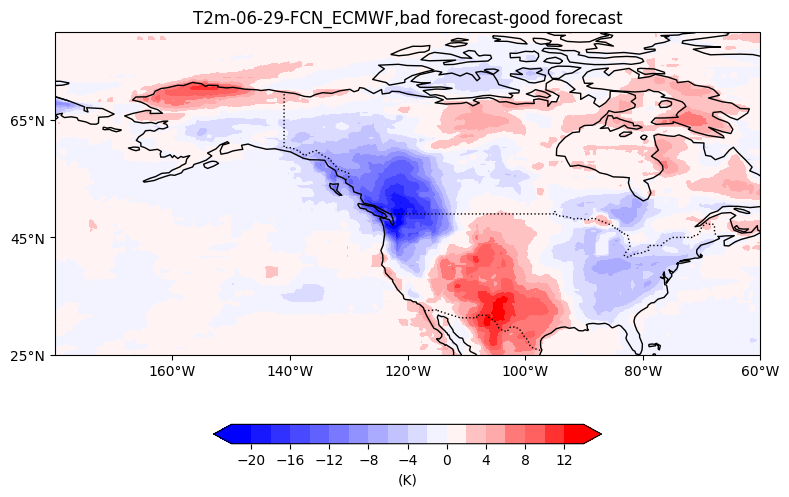

In [78]:
#check if the abnormal sst problem is caused by clor bar settings


#create plots with  DIFFERENCE  9 subplots

# Create a new subplot for additional plots
fig2 = plt.figure(figsize=(10,6))
#proj = ccrs.PlateCarree(central_longitude=-120)
#ax1 = fig2.add_axes([0.1, 0.8, 0.5, 0.3],projection = proj)
ax1 = plt.axes(projection=ccrs.PlateCarree())

cmap = mcolors.LinearSegmentedColormap.from_list(name='red_white_blue', 
                                                 colors =[(0, 0, 1), 
                                                          (1, 1., 1), 
                                                          (1, 0, 0)],
                                                 N=22,
                                                 )

vmax = np.max(fcn_ec_difference)
vmin = np.min(fcn_ec_difference)
#vmax = difference_ec_14.max()
#vmin = difference_ec_14.min()
#cmap = plt.get_cmap('coolwarm')
norm = TwoSlopeNorm(vmin=vmin, vcenter=0, vmax=vmax)
#plot_kwargs = dict(cmap = "coolwarm", vmin=vmin, vmax=vmax,levels = 20)
#norm = mcolors.Normalize(-30,40)
#newcmp = ListedColormap(vals)
#cmap = mcolors.LinearSegmentedColormap.from_list("", ["blue","white","red"])
#cmap = ListedColormap(['red', 'white', 'blue'])
plot_kwargs = dict(cmap=cmap, norm = norm,levels = 20)
#cmap=cmap, norm=norm






ax1.set_extent([leftlon, rightlon, lowerlat, upperlat], crs=ccrs.PlateCarree())
ax1.add_feature(cfeature.COASTLINE)
ax1.add_feature(cfeature.BORDERS, linestyle=':')
ax1.add_feature(cfeature.LAND, facecolor='lightgray')
ax1.add_feature(cfeature.OCEAN, facecolor='w')
leftlon, rightlon, lowerlat, upperlat = (-180,-60,25,80)#define map extent
#ax1.set_xticks(np.arange(leftlon,rightlon+10,20), crs=ccrs.PlateCarree())
ax1.set_xticks(np.arange(leftlon+20,rightlon+10,20), crs=ccrs.PlateCarree())
ax1.set_yticks(np.arange(lowerlat,upperlat,20), crs=ccrs.PlateCarree())
lat_formatter = cticker.LatitudeFormatter()
lon_formatter = cticker.LongitudeFormatter()
ax1.xaxis.set_major_formatter(lon_formatter)
ax1.yaxis.set_major_formatter(lat_formatter)

contour1 = ax1.contourf(x,y,fcn_ec_difference[::-1,:],**plot_kwargs,extend = 'both')
#ax1.plot(red_point_lon, red_point_lat, 'r*', markersize=7)
#ax1.add_patch(rect)
#fourcastnet(ECMWF):FIRST:PERTUBED MEMBERS(50-CONTROL FORECAST),SECOND:LEAD TIME,THIRD:VARIABLES
#phony_dim_2: 21phony_dim_0: 51phony_dim_1: 57phony_dim_3: 220phony_dim_4: 480
#cbar = plt.colorbar(contour, ax=ax[0], label='Temperature/K', orientation='horizontal', shrink=0.5)
#ax1.set_title('Forecastnet(ECMWF)',loc='left')
ax1.set_title('T2m-06-29-FCN_ECMWF,bad forecast-good forecast')
#ax1.set_xlabel('Longitude')
#ax1.set_ylabel('ECMWF')





#norm = mcolors.TwoSlopeNorm(vmin=vmin, vcenter=0, vmax=vmax)
#norm = mcolors.TwoSlopeNorm(vcenter=0)
#pc = plt.pcolormesh(axs, norm=norm, cmap=cmap)
#cb = plt.colorbar(pc,orientation='horizontal',shrink=0.5,label='Temperature/K',extend='both')
#cbar.set_ticks()
#cb.add_lines(CS) 
#im = ax9.pcolormesh(x, y, difference_fcn_era_7, cmap=cmap, norm=norm)
#fig.colorbar(im, ax=axs)
#tick_positions = [-abs(vmin), -abs(vmin)/2, 0, abs(vmax)/2, abs(vmax)]
#tick_labels = [f'{val:.1f}' for val in tick_positions]
cbar = plt.colorbar(contour1, ax=ax1, orientation='horizontal', cmap=cmap, norm=norm, shrink=0.5,label='(K)',extend = 'both')
#plt.savefig('/home/kit/imk-tro/gj5173/06.09_modified-plts/3*3_difference_t2m.png', bbox_inches='tight',dpi=100)
#cbar.set_ticklabels(tick_labels)
#plt.colorbar()

plt.savefig('/home/kit/imk-tro/gj5173/03.10-plots/T2m_fcn_ec-difference.png', bbox_inches='tight',dpi=100)
#cbar = fig.colorbar(contour1, ax=axs, extend = 'both',label='Temperature/K', orientation='vertical',shrink=0.5)

In [31]:
#fcn_era5
ds_fcn_era = xr.open_dataset('/pfs/work7/workspace/scratch/ab6801-fourcastnet/fourcastnet/2021_dt_list_ens_backtransformed.nc',engine = 'netcdf4')
ds_fcn_era
fcn_era_z = ds_fcn_era.forecast[:,:,:,2,:,:]

In [37]:
variable_data_ec_1 = fcn_era_z[1,:,56,:,:]


variable_data_ec_2 = fcn_era_z[2,:,52,:,:]
#mean_fcn_ec_1 = np.mean(variable_data_fcn_ec_1, axis=(-2, -1))


variable_data_ec_3 = fcn_era_z[3,:,48,:,:]

variable_data_ec_4 = fcn_era_z[4,:,44,:,:]

variable_data_ec_5 = fcn_era_z[5,:,40,:,:]

variable_data_ec_6 = fcn_era_z[6,:,36,:,:]

variable_data_ec_7 = fcn_era_z[7,:,32,:,:]

variable_data_ec_8 = fcn_era_z[8,:,28,:,:]

variable_data_ec_9 = fcn_era_z[9,:,24,:,:]

variable_data_ec_10 = fcn_era_z[10,:,20,:,:]

variable_data_ec_11 = fcn_era_z[12,:,16,:,:]

variable_data_ec_12 = fcn_era_z[13,:,12,:,:]

variable_data_ec_13 = fcn_era_z[14,:,8,:,:]

variable_data_ec_14 = fcn_era_z[15,:,4,:,:]

variable_data_ec_15 = fcn_era_z[16,:,0,:,:]

In [1]:
new_dimension = 'time'
ds_ec_1_expanded = variable_data_ec_1.expand_dims(**{new_dimension: [0]})
ds_ec_2_expanded = variable_data_ec_2.expand_dims(**{new_dimension: [1]})
ds_ec_3_expanded = variable_data_ec_3.expand_dims(**{new_dimension: [2]})
ds_ec_4_expanded = variable_data_ec_4.expand_dims(**{new_dimension: [3]})
ds_ec_5_expanded = variable_data_ec_5.expand_dims(**{new_dimension: [4]})
ds_ec_6_expanded = variable_data_ec_6.expand_dims(**{new_dimension: [5]})
ds_ec_7_expanded = variable_data_ec_7.expand_dims(**{new_dimension: [6]})
ds_ec_8_expanded = variable_data_ec_8.expand_dims(**{new_dimension: [7]})
ds_ec_9_expanded = variable_data_ec_9.expand_dims(**{new_dimension: [8]})
ds_ec_10_expanded = variable_data_ec_10.expand_dims(**{new_dimension:[9]})
ds_ec_11_expanded = variable_data_ec_11.expand_dims(**{new_dimension: [10]})
ds_ec_12_expanded = variable_data_ec_12.expand_dims(**{new_dimension: [11]})
ds_ec_13_expanded = variable_data_ec_13.expand_dims(**{new_dimension: [12]})
ds_ec_14_expanded = variable_data_ec_14.expand_dims(**{new_dimension: [13]})
ds_ec_15_expanded = variable_data_ec_15.expand_dims(**{new_dimension: [14]})

NameError: name 'variable_data_ec_1' is not defined

In [40]:
ds_fc_ec_t2m_wider = xr.concat([ds_ec_1_expanded,ds_ec_2_expanded,ds_ec_3_expanded,ds_ec_4_expanded,ds_ec_5_expanded,ds_ec_6_expanded,ds_ec_7_expanded,ds_ec_8_expanded,ds_ec_9_expanded,ds_ec_10_expanded,ds_ec_11_expanded,ds_ec_12_expanded,ds_ec_13_expanded,ds_ec_14_expanded,ds_ec_15_expanded],dim=new_dimension)

In [2]:
ds_fc_ec_t2m_wider

NameError: name 'ds_fc_ec_t2m_wider' is not defined

In [ ]:
good_forecast_wider = ds_fc_ec_t2m_wider[good_forecast_index]
bad_forecast_wider = ds_fc_ec_t2m_wider[bad_forecast_index]